In [1]:
import numpy as np

In [2]:
from tree_inference.data_generator import DataGenerator

## Simulate a tree

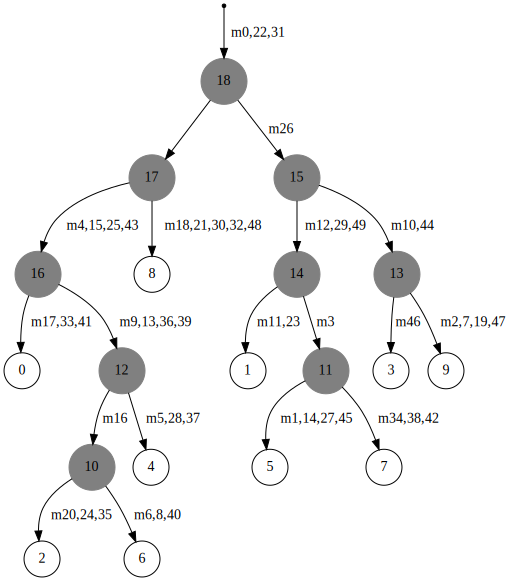

In [3]:
# Generate a random cell lineage tree with 10 samples and 50 mutations
generator = DataGenerator(10, 50)
generator.random_tree()

# Visualize the generated tree
# Cells are represented by white circles
# Ancestor cells are represented by grey circles
# Mutations are indicated on branches
generator.tree.to_graphviz()

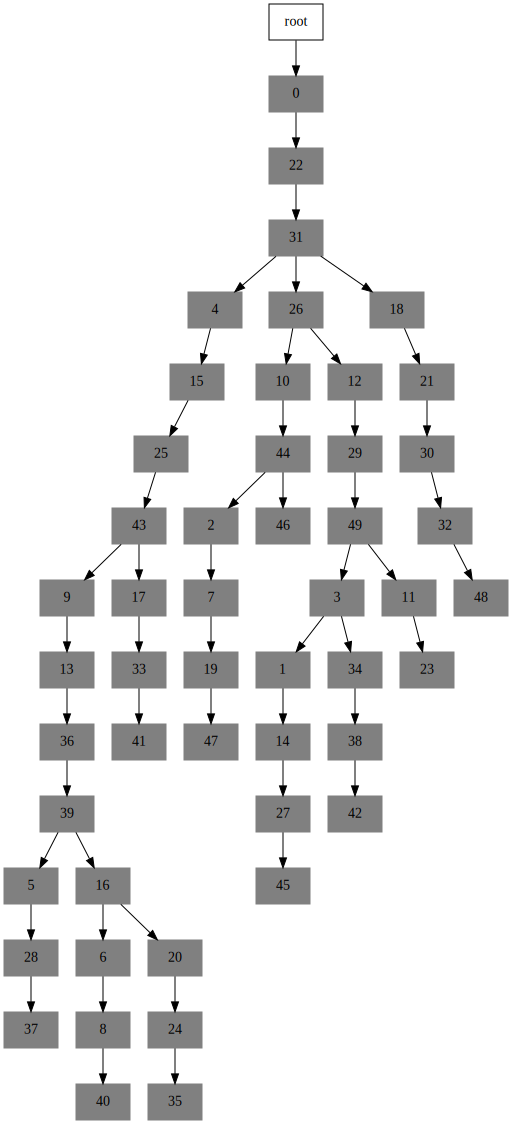

In [4]:
# Convert to mutation tree and visualize it
from tree_inference.tree import MutationTree
mut_tree = MutationTree(generator.tree.n_mut)
mut_tree.fit_structure(generator.tree)
mut_tree.to_graphviz()

In [5]:
# Alter the genotypes in a set of the mutation sites
# Here, 50% of the sites will be mutated
# The argument "genotype_freq" specifies the proportions of each genotype in wildtype cells (i.e. at the root)
# 1/3 of the mutated sites will be homozygous for the reference allele
# 1/3 of the mutated sites will be homozygous for the alternative allele
# 1/3 of the mutated sites will be heterozygous
generator.random_mutations(mut_prop = 0.5, genotype_freq = [1/3, 1/3, 1/3])

In [6]:
# Print the genotype transitions
for gt1, gt2 in zip(generator.gt1, generator.gt2):
    print('%s->%s' % (gt1, gt2))

R->H
H->A
A->A
R->H
R->R
A->H
H->A
A->A
R->H
R->H
R->H
A->A
H->H
R->H
A->A
H->H
A->A
H->H
A->A
H->R
R->R
A->H
A->A
R->H
R->H
A->A
A->A
H->A
H->A
A->A
H->R
H->H
H->R
R->R
H->H
R->H
H->H
A->H
A->A
H->R
A->A
H->H
H->A
A->H
H->H
A->A
A->H
R->R
A->H
H->R


In [7]:
# Generate read counts matries for the tree data
# Samples coverage poisson distribution  []
ref, alt = generator.generate_reads()

In [8]:
i = 0 # cell index
j = 0 # locus index
print('Cell %d has %d reference reads and %d alternative reads at locus %d' % (i, ref[i,j], alt[i,j], j))

Cell 0 has 0 reference reads and 0 alternative reads at locus 0


### Select mutations to be used for inference

In [10]:
from tree_inference.mutation_detection import filter_mutations, likelihood_matrices
ref, alt, gt1, gt2 = filter_mutations(ref, alt, method = 'threshold', t = 0.5)

### In these sites, calculate likelihoods of each cell being mutated / not mutated

In [12]:
likelihoods1, likelihoods2 = likelihood_matrices(ref, alt, gt1, gt2)

In [13]:
print(gt1[0], gt2[0])

R H


In [14]:
i = 0
j = 0
print('Likelihood of cell %d being wildtype at locus %d is %f' % (i, j, np.exp(likelihoods1[i,j])))
print('Likelihood of cell %d being mutated at locus %d is %f' % (i, j, np.exp(likelihoods2[i,j])))

Likelihood of cell 0 being wildtype at locus 0 is 0.558056
Likelihood of cell 0 being mutated at locus 0 is 0.000719


## Tree inference

In [15]:
from tree_inference import TreeOptimizer
optimizer = TreeOptimizer()
optimizer.fit(likelihoods1, likelihoods2, reversible = True)

In [16]:
optimizer.optimize()

[Cell Tree Space] convergence after 140 steps and 14 move(s).
[Mutation Tree Space] convergence after 159 steps and 1 move(s).
[Cell Tree Space] convergence after 72 steps and 1 move(s).
[Mutation Tree Space] convergence after 130 steps and 0 move(s).
[Cell Tree Space] convergence after 76 steps and 1 move(s).
[Mutation Tree Space] convergence after 130 steps and 0 move(s).
[Cell Tree Space] convergence after 50 steps and 0 move(s).


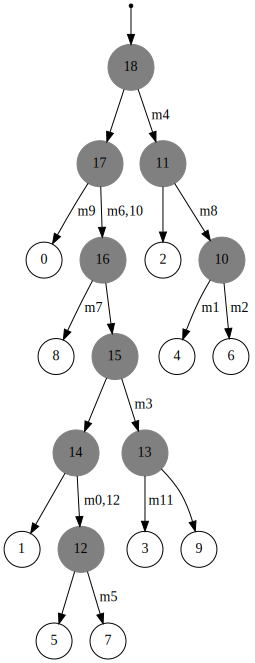

In [17]:
optimizer.ct.to_graphviz()

In [ ]:
# Add function to run compute MSE and compare with ground truth